# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import warnings
warnings.simplefilter('ignore')  

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv("Temp_States.csv", encoding='ISO-8859-1')

#### Print `temp`

In [3]:
temp.columns=[c.lower().replace(' ', '_') for c in temp.columns]

temp.head()

,city,state,temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.describe()

,temperature
count,7.000000
mean,15.158730
std,6.695265
min,3.333333
25%,11.944444
50%,17.222222
75%,19.722222
max,22.222222


Maximum temperature recorded in US was 22 degrees, with a minimum of 3 degrees. 
The average temeperature was 15 degrees.

#### Select the rows where state is New York

In [5]:
# your answer here
contain_values = temp[temp['state'].str.contains('New York')]
print (contain_values)

      city     state  temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
contain_values.describe()

,temperature
count,3.000000
mean,10.740741
std,8.133404
min,3.333333
25%,6.388889
50%,9.444444
75%,14.444444
max,19.444444


Average temperature in NYC State is 10.74 degrees

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
temp1=temp.loc[temp['temperature'] >15] 
temp1

,city,state,temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
temp2=temp1.drop(columns=["state" ])
temp2

,city,temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
temp3=temp.loc[ (temp['temperature'] >15) & (temp['temperature'] <20)] 
temp3

,city,state,temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
temp4=temp.groupby('state').describe()
temp4

temperature                                                        \
                  count       mean       std        min        25%        50%   
state                                                                           
Connecticut         2.0  15.833333  1.964186  14.444444  15.138889  15.833333   
New Jersey          2.0  21.111111  1.571348  20.000000  20.555556  21.111111   
New York            3.0  10.740741  8.133404   3.333333   6.388889   9.444444   

                                   
                   75%        max  
state                              
Connecticut  16.527778  17.222222  
New Jersey   21.666667  22.222222  
New York     14.444444  19.444444

In [11]:
temp4.columns

MultiIndex([('temperature', 'count'),
            ('temperature',  'mean'),
            ('temperature',   'std'),
            ('temperature',   'min'),
            ('temperature',   '25%'),
            ('temperature',   '50%'),
            ('temperature',   '75%'),
            ('temperature',   'max')],
           )

In [12]:
temp5=temp4[[('temperature',  'mean'),('temperature',   'std')]]
temp5

temperature          
                   mean       std
state                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
# your answer here
employee=pd.read_csv('employee.csv')
employee.columns=[c.lower()for c in employee.columns]
employee

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
# your answer here
employee.describe()

,years,salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### What's the average salary in this company?

In [15]:
# your answer here
employee.salary.mean()

48.888888888888886

#### What's the highest salary?

In [16]:
# your answer here
employee.salary.max()

70

#### What's the lowest salary?

In [17]:
# your answer here
employee.salary.min()

30

#### Who are the employees with the lowest salary?

In [18]:
# your answer here
lowest_salary= employee[(employee['salary']==employee.salary.min())]
lowest_salary

,name,department,education,gender,title,years,salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [19]:
# your answer here
employee.loc[employee['name'] == "David"]

,name,department,education,gender,title,years,salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [20]:
# your answer here
employee.loc[employee['name'] == "David", 'salary']

2    30
Name: salary, dtype: int64

#### Print all the rows where job title is associate

In [21]:
# your answer here
employee.loc[employee['title'] =="associate"]

,name,department,education,gender,title,years,salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [22]:
# your answer here- 1 method
employee.head(3)


,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [23]:
# your answer here- 2nd method
employee[0:3]

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [24]:
# your answer here
employee.loc[ (employee['title'] =="associate") & (employee['salary'] >55)]

,name,department,education,gender,title,years,salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [25]:
# your answer here
years_of_employment=employee.groupby('years').mean()
years_of_employment

,salary
years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [26]:
# your answer here
avg_salary_title=employee.groupby('title').mean()
avg_salary_title

,years,salary
title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [27]:
# print first quartile here
values=employee.describe().reset_index()
values

,index,years,salary
0,count,9.000000,9.000000
1,mean,4.111111,48.888889
2,std,2.803767,16.541194
3,min,1.000000,30.000000
4,25%,2.000000,35.000000
5,50%,3.000000,55.000000
6,75%,7.000000,60.000000
7,max,8.000000,70.000000


In [28]:
values.loc[values['index'] == "25%"]

,index,years,salary
4,25%,2.0,35.0


In [29]:
# print third quartile here
values.loc[values['index'] == "75%"]

,index,years,salary
6,75%,7.0,60.0


#### Is the mean salary per gender different?

Yes, women get paid less

In [30]:
# your answer here
employee.groupby("gender").mean()

,years,salary
gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

array([<AxesSubplot:title={'center':'years'}, xlabel='gender'>,
       <AxesSubplot:title={'center':'salary'}, xlabel='gender'>],
      dtype=object)

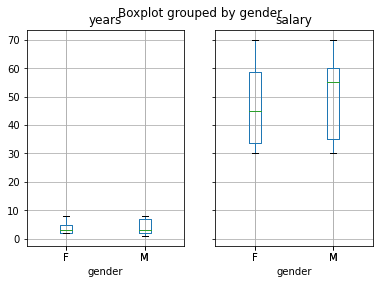

In [31]:
# your answer here
employee.boxplot(by="gender" , column=['years', 'salary'])

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [33]:
# your answer here
orders=pd.read_csv('Orders.zip')
orders.columns=[c.lower()for c in orders.columns]
orders

,unnamed: 0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [34]:
# your answer here
orders.dtypes

unnamed: 0        int64
invoiceno         int64
stockcode        object
year              int64
month             int64
day               int64
hour              int64
description      object
quantity          int64
invoicedate      object
unitprice       float64
customerid        int64
country          object
amount_spent    float64
dtype: object

In [35]:
# your answer here
orders.describe()

,unnamed: 0,invoiceno,year,month,day,hour,quantity,unitprice,customerid,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [36]:
# your answer here
orders.columns


Index(['unnamed: 0', 'invoiceno', 'stockcode', 'year', 'month', 'day', 'hour',
       'description', 'quantity', 'invoicedate', 'unitprice', 'customerid',
       'country', 'amount_spent'],
      dtype='object')

In [37]:
orders['unitprice'].mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [38]:
# your answer here
orders['unitprice'].max()

8142.75

In [39]:
# your answer here
orders['unitprice'].min()

0.0

#### Select all the customers we have in Spain

In [40]:
# your answer here
spain_customers=orders.loc[orders['country'] == "Spain"]

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [41]:
# your answer here
len(spain_customers)

2485

#### Select all the customers who have bought more than 50 items ?

In [42]:
# your answer here
above_50items=orders.loc[orders['quantity'] > 50]

In [43]:
len(above_50items)

11609

#### Select orders from Spain that are above 50 items

In [44]:
# your answer here
above50_Spain=orders.loc[(orders["country"] == "Spain") & (orders['quantity'] > 50)]

In [45]:
above50_Spain.shape

(39, 14)

#### Select all free orders

In [46]:
# your answer here
free_orders=orders.loc[orders["unitprice"] == 0]

In [47]:
free_orders.shape

(40, 14)

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [48]:
# your answer here
lunch_bag = orders[orders['description'].str.contains('lunch bag')]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [49]:
# your answer here
lunch_bags_made_in_2011=lunch_bag.loc[lunch_bag["year"] ==2011]

#### Show the frequency distribution of the amount spent in Spain.

In [50]:
# your answer here
spain_customers.amount_spent.value_counts()

15.00     186
17.70     122
19.80      99
17.40      86
10.20      76
         ... 
18.95       1
29.85       1
1.14        1
66.40       1
190.40      1
Name: amount_spent, Length: 316, dtype: int64

#### Select all orders made in the month of August

In [51]:
# your answer here
orders_aug=orders.loc[orders["month"] ==8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [52]:
# your answer here
orders.head()

,unnamed: 0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [53]:
orders_pcm=orders.groupby(['country','month'], as_index=False)['quantity'].sum()

In [54]:
orders_pcm=orders_pcm.loc[orders_pcm["month"] ==8]
orders_pcm

,country,month,quantity
7,Australia,8,12570
17,Austria,8,790
29,Belgium,8,2069
39,Canada,8,52
46,Channel Islands,8,2009
66,Denmark,8,338
78,EIRE,8,9331
92,Finland,8,693
104,France,8,7958
116,Germany,8,9641


#### What's the  average amount of money spent by country

In [55]:
# your answer here
orders_avg=orders.groupby(['country'], as_index=False)['amount_spent'].mean()

In [56]:
orders_avg

,country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [57]:
# your answer here
orders.unitprice.max()

8142.75

#### What was the average amount spent per year ?

In [58]:
# your answer here
orders_per_year=orders.groupby(['year'], as_index=False)['amount_spent'].mean()

In [59]:
orders_per_year

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
